### Importing the needed library

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from glob import glob


In [2]:
# Get the path of all the files in the folder
path = glob("C:/Users/DELLL-PC/Downloads/Pizza+Place+Sales/pizza_sales/*") 

## Data Cleaning and Manipulation

In [3]:
# Create a dataframe to store the file paths
files = pd.DataFrame(path)
files

,0
0,C:/Users/DELLL-PC/Downloads/Pizza+Place+Sales/...
1,C:/Users/DELLL-PC/Downloads/Pizza+Place+Sales/...
2,C:/Users/DELLL-PC/Downloads/Pizza+Place+Sales/...
3,C:/Users/DELLL-PC/Downloads/Pizza+Place+Sales/...


In [4]:
df_order = pd.read_csv(files.iloc[0,0]) # Read the first file in the dataframe
df_order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [8]:
df_order["date"] = pd.to_datetime(df_order["date"]) # Convert the date column to datetime format in the order dataframe
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 500.5+ KB


In [10]:
df_order_detail= pd.read_csv(files.iloc[1,0]) # Read the second file in the dataframe order detail 
df_order_detail.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [15]:
df_piz = pd.read_csv(files.iloc[2,0]) # Read the third file in the dataframe
df_piz.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [19]:
df_piz["size"] = df_piz["size"].astype("category") # Convert the size column to category data type in the pizza dataframe
df_piz.info() # Check the data types of the columns in the pizza dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pizza_id       96 non-null     object  
 1   pizza_type_id  96 non-null     object  
 2   size           96 non-null     category
 3   price          96 non-null     float64 
dtypes: category(1), float64(1), object(2)
memory usage: 2.7+ KB


In [21]:
df_piz_type= pd.read_csv(files.iloc[3,0], encoding="latin1") # Read the fourth file in the dataframe with encoding
df_piz_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [23]:
df_piz_type["category"] = df_piz_type["category"].astype("category") # Convert the category column to category data type in the pizza type dataframe

Merging common data based on ID

In [26]:
df_order_order_detail = pd.merge(df_order, df_order_detail, on="order_id", how="outer") # Merge the order and order detail dataframes on the order_id column using outer join
df_order_order_detail.shape[0]

48620

In [28]:
df_order_order_detail.info() # Check the data types of the columns in the merged dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 2.2+ MB


In [31]:
df_piz_piz_type = pd.merge(df_piz, df_piz_type, on="pizza_type_id", how="inner") # Merge the pizza and pizza type dataframes on the pizza_id column using outer join
df_piz_piz_type.shape[0]
df_piz_piz_type.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [32]:
df_piz_piz_type["category"].value_counts() # Check the unique values in the category column of the merged pizza and pizza type dataframe

category
Veggie     27
Classic    26
Supreme    25
Chicken    18
Name: count, dtype: int64

In [34]:
df_piz_piz_type.info() # Check the data types of the columns in the merged pizza dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pizza_id       96 non-null     object  
 1   pizza_type_id  96 non-null     object  
 2   size           96 non-null     category
 3   price          96 non-null     float64 
 4   name           96 non-null     object  
 5   category       96 non-null     category
 6   ingredients    96 non-null     object  
dtypes: category(2), float64(1), object(4)
memory usage: 4.5+ KB


# Exploratory Data Analysis(EDA)

In [35]:
df_piz_pla_sales = pd.merge(df_order_order_detail, df_piz_piz_type, on = "pizza_id", how = 'inner')
df_piz_pla_sales

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


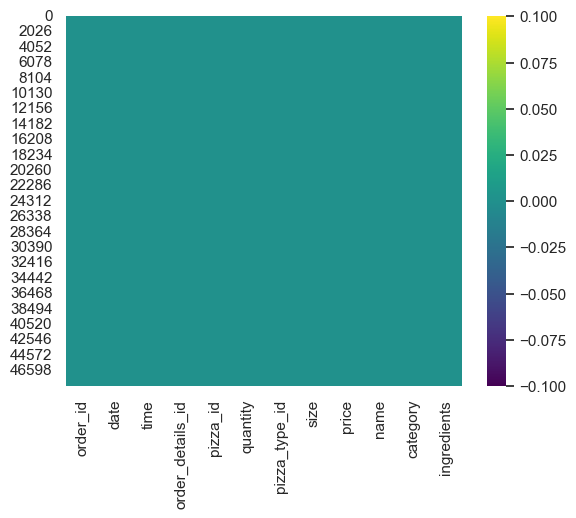

In [38]:
sns.heatmap(pd.isnull(df_piz_pla_sales),cmap='viridis')
plt.show()

## Recommended Analysis

1. What is the total revenue/sales?

In [39]:
#W
df_piz_pla_sales["total_price"] = df_piz_pla_sales["quantity"] * df_piz_pla_sales["price"] # Calculate the total price for each order by multiplying the quantity and price columns in the merged dataframe
total_revenue = df_piz_pla_sales["total_price"].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")

Total Revenue: $817,860.05


2. Find the total quantity sold.


In [40]:
total_quantity = df_piz_pla_sales["quantity"].sum() #Calculate the total quantity of pizzas sold by summing the quantity column in the merged dataframe
print(f"Total quantity: {total_quantity:,.2f}")

Total quantity: 49,574.00


3. Find the total orders.


In [41]:
total_order = df_piz_pla_sales["order_id"].nunique() # Calculate the total number of unique orders by counting the unique values in the order_id column of the merged dataframe
print(f"Total order: {total_order:,.2f}")

Total order: 21,350.00


4. How many pizza types do they sell?

In [42]:
piz_type= len(df_piz_pla_sales["name"].unique())
print(f'They sell {piz_type} Pizza type.')

They sell 32 Pizza type.


5. Find the average price of the pizzas.

In [43]:
piz_mean = df_piz_pla_sales["price"].mean()
print(f'Pizz average price is {piz_mean:,.2f}')

Pizz average price is 16.49


6. What are the peak hours of sales?

In [44]:
df_piz_pla_sales["dt_hr"] = pd.to_datetime(df_piz_pla_sales["time"]).dt.hour # Extract the hour from the time column in the merged dataframe and store it in a new variable
df_piz_pla_sales['dt_hr']

0        11
1        11
2        11
3        11
4        11
         ..
48615    21
48616    21
48617    21
48618    22
48619    23
Name: dt_hr, Length: 48620, dtype: int32

    total_price  dt_hr
55        83.00     14
54        62.25     14
53        61.50     12
52        55.50     13
51        51.00     18
50        50.25     13
49        49.50     21
48        48.75     13
47        48.00     13
46        47.30     16


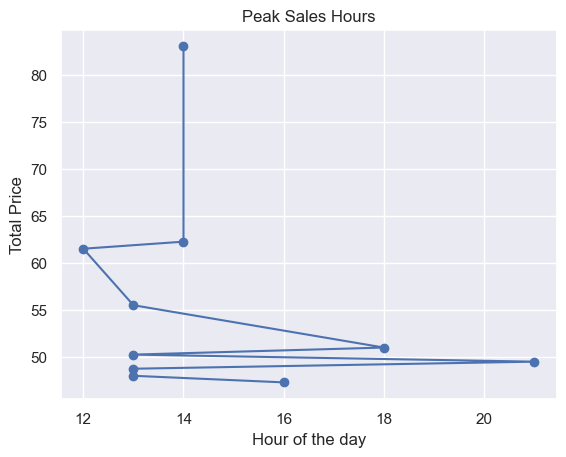

In [45]:
peak_hrs = df_piz_pla_sales.groupby("total_price")["dt_hr"].max().reset_index().sort_values(by="total_price", ascending=False).head(10)
print(peak_hrs)
plt.plot(peak_hrs["dt_hr"], peak_hrs["total_price"], marker='o')
plt.xlabel("Hour of the day")
plt.ylabel("Total Price")
plt.title("Peak Sales Hours")
plt.show()

In [46]:
print(f"The peak sales hour is : {peak_hrs.iloc[0, 1]}")

The peak sales hour is : 14


7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [47]:
df_piz_pla_sales["weekday"] = df_piz_pla_sales["date"].dt.day_name()
sales_per_day = pd.DataFrame(df_piz_pla_sales.groupby(by= 'weekday')["total_price"].max().reset_index())
print (sales_per_day)

print(f'Sales are made most on {sales_per_day.iloc[2]}')

     weekday  total_price
0     Friday        62.25
1     Monday        51.00
2   Saturday        83.00
3     Sunday        61.50
4   Thursday        62.25
5    Tuesday        51.00
6  Wednesday        50.25
Sales are made most on weekday        Saturday
total_price        83.0
Name: 2, dtype: object


8. Find the top best selling Pizza 

In [48]:
price_count = pd.DataFrame(df_piz_pla_sales.groupby("name")["total_price"].max().reset_index().sort_values( "total_price",ascending= False).head(5))
price_count

,name,total_price
4,The California Chicken Pizza,83.00
0,The Barbecue Chicken Pizza,62.25
26,The Spicy Italian Pizza,62.25
22,The Prosciutto and Arugula Pizza,62.25
30,The Thai Chicken Pizza,62.25


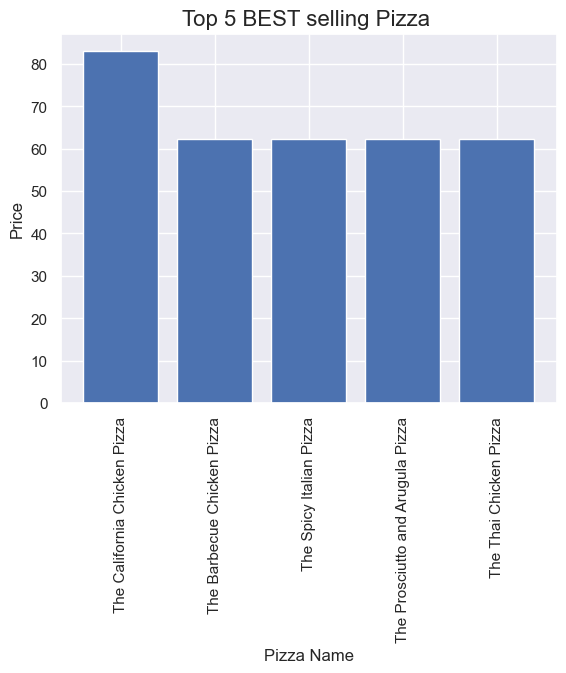

In [49]:
plt.bar(price_count["name"], price_count["total_price"])
plt.xticks(rotation = 90)
plt.title("Top 5 BEST selling Pizza ", fontsize=16 )
plt.xlabel("Pizza Name")
plt.ylabel("Price")
plt.show()


### 9. Find the sales made in each month. Any trend noticable?

In [50]:
df_piz_pla_sales["month"] = df_piz_pla_sales["date"].dt.month_name()
df_piz_pla_sales["month"]

0         January
1         January
2         January
3         January
4         January
           ...   
48615    December
48616    December
48617    December
48618    December
48619    December
Name: month, Length: 48620, dtype: object

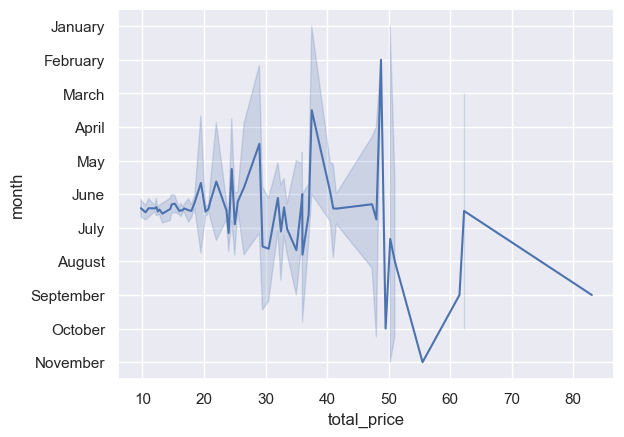

In [51]:
sns.lineplot(x = "total_price", y = "month", data = df_piz_pla_sales) 
plt.show()

### 10.Are there pizza types that are not doing well on the menu?

In [55]:
total_price_mean = df_piz_pla_sales["total_price"].mean()
low_sales_piz = df_piz_pla_sales[df_piz_pla_sales["total_price"] < total_price_mean]
price_count = pd.DataFrame(df_piz_pla_sales.groupby("name")["total_price"].min().reset_index().sort_values( "total_price",ascending= True).head(20))

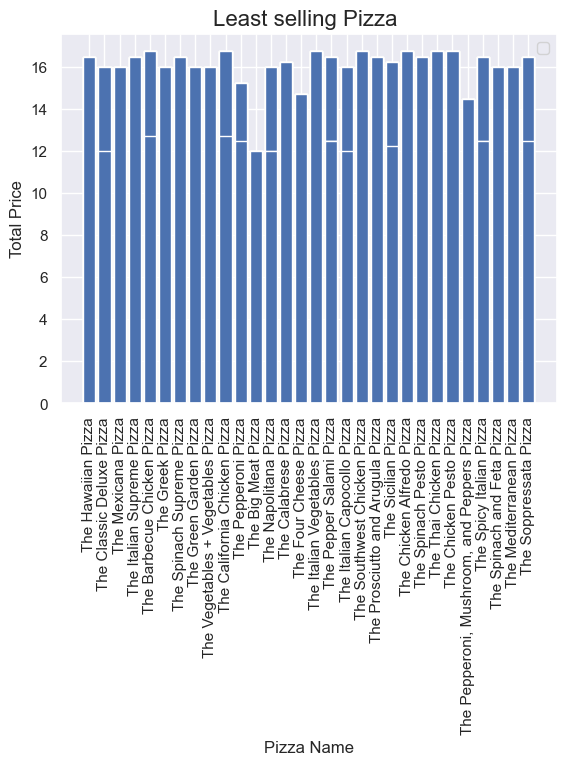

In [56]:

plt.bar(low_sales_piz["name"], low_sales_piz["total_price"])
plt.xticks(rotation = 90)
plt.title("Least selling Pizza ", fontsize=16 )
plt.xlabel("Pizza Name")
plt.ylabel("Total Price")
plt.legend()
plt.show()
